AIDI1009-24F-10827:** Assignment #3 - AI-Driven Brain Tumor Classification Using ResNet50 + MLJAR AutoML**

• Ronald Kalani - 200619730


Instructor: Jahanzeb Abbas


Course: Technology & Visual Arts - AIDI 1010 - Emerging Technologies



Submission Date: April 19, 2025

**AI-Driven Brain Tumor Classification Using ResNet50 and MLJAR AutoML**

This project focuses on developing an AI-powered diagnostic system capable of accurately classifying brain tumor types from MRI images. By integrating a deep learning model, ResNet50, with the MLJAR AutoML platform, the solution explores a hybrid approach to leverage both image-based pattern recognition and structured data automation. This dual-strategy setup aims to enhance classification accuracy, reduce manual diagnostic time, and minimize variability in radiological interpretations, providing a practical and scalable solution for real-world healthcare environments.

**Goal**

The main goal is to build an accurate and efficient classification system that automates brain tumor detection in MRI scans. The project implements a hybrid approach: first, using ResNet50, a deep convolutional neural network pre-trained on ImageNet, to extract image features and perform classification via transfer learning. Then, MLJAR AutoML is applied to structured representations of MRI data to automate benchmarking, model selection, and optimization. Together, these approaches aim to deliver robust performance, handle small dataset constraints, and provide transparency through evaluation metrics and comparisons with previous prototypes.

**Intended Audience**

This project is targeted at multiple key stakeholders in the healthcare and artificial intelligence sectors. These include clinical researchers and radiologists who benefit from quicker and more consistent diagnostic tools, and AI engineers and data scientists interested in the development and application of deep learning in medical imaging. Moreover, healthcare investors, hospital administrators, and MedTech stakeholders looking to explore AI-driven diagnostic enhancements are also an integral part of the audience. The project is designed to be interpretable, reproducible, and clinically meaningful.

**Strategy & Pipeline Steps**

The strategy for this project was broken down into clear and systematic pipeline steps. Initially, MRI brain images were preprocessed by resizing to a fixed dimension (typically 224x224 pixels) and normalized to fit the input requirements of ResNet50. Transfer learning was then applied using the ResNet50 model with pre-trained weights from ImageNet to fine-tune the model on the specific tumor classification task. The dataset was split into training and testing sets using stratified sampling to maintain class balance.

Simultaneously, image features and metadata were transformed into structured formats to be fed into the MLJAR AutoML platform, which performed feature selection, model training, and hyperparameter tuning across various machine learning algorithms. Model performance was evaluated using metrics such as accuracy, precision, recall, F1-score, confusion matrix, and ROC-AUC curves. A comparison was made with the baseline prototype developed in Assignment 2 and referenced literature to assess improvements.

Optionally, conceptual extensions were discussed including the application of Artificial General Intelligence (AGI) and the future integration of quantum computing for complex diagnostic environments with high-dimensional imaging data.

**Challenges**

Several key challenges were encountered during the project lifecycle. One major issue was class imbalance, where certain tumor categories such as Glioma) had more samples than others like Pituitary tumors, which could bias the model. To counter this, data augmentation techniques such as image rotation and flipping were used. Another significant limitation was the small dataset size, which posed overfitting risks during deep learning training. This was mitigated by applying transfer learning with ResNet50 to utilize generalized features learned from a large corpus.

Moreover, computational constraints were a hurdle, especially on local machines lacking high-performance GPUs. Long training times and memory bottlenecks were solved by optimizing batch sizes and freezing early ResNet layers. Despite these issues, the model was trained successfully with satisfactory results.

**Problem Statement**

Brain tumors are a critical health concern due to their life-threatening nature and the challenges associated with accurate diagnosis. Early and reliable tumor classification is essential for timely treatment, yet manual MRI scan interpretation is time-consuming and varies across radiologists. This project addresses these issues by developing an AI-based diagnostic system that classifies brain tumors using MRI images. The two main technical goals are achieving high classification accuracy and improving explainability to support clinical trust. A hybrid modeling approach is used, combining ResNet50—a deep convolutional neural network fine-tuned on MRI data—for image-based recognition, and MLJAR AutoML for structured, feature-based classification and benchmarking.


The model is trained on a publicly available dataset of four categories: glioma, meningioma, pituitary tumor, and no tumor (healthy scans). All images were resized to 224x224 pixels and normalized for consistency. This work builds upon previous submissions from Assignment 1 (problem framing and baseline analysis) and Assignment 2 (initial ResNet50 implementation). For Assignment 3, the project expands with the integration of MLJAR AutoML, addition of model performance evaluation metrics, and a focus on explainability. While Grad-CAM visualizations were initially planned, they were not included due to time constraints. This submission represents an evolved and original continuation—not a repetition—of prior work, aligned with the learning outcomes and expectations of the final assignment.

Data set

The dataset used for this project is the Brain Tumor Classification (MRI) dataset sourced from Kaggle, consisting of three tumor classes: Glioma, Meningioma, and Pituitary tumor. It contains T1-weighted contrast-enhanced MRI images categorized into labeled folders for each tumor type. The dataset includes training and testing subsets, with images in JPEG format, varying in resolution, and captured from different patients, allowing for supervised learning and classification tasks. This dataset supports both deep learning (image-based) and structured feature extraction for hybrid modeling.

**Step 1: Mount Google Drive and Prepare Dataset**

Mount Google Drive to access your image folders, and then organize all tumor and normal class images into a single unified dataset directory (/content/dataset_combined) with four subfolders.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import shutil, os

# Create a new directory for unified dataset
new_data_path = '/content/dataset_combined'
os.makedirs(new_data_path, exist_ok=True)

# Copy folders
shutil.copytree('/content/drive/MyDrive/Emerging/Normal', f'{new_data_path}/Normal')
shutil.copytree('/content/drive/MyDrive/Emerging/Tumor/glioma_tumor', f'{new_data_path}/glioma_tumor')
shutil.copytree('/content/drive/MyDrive/Emerging/Tumor/meningioma_tumor', f'{new_data_path}/meningioma_tumor')
shutil.copytree('/content/drive/MyDrive/Emerging/Tumor/pituitary_tumor', f'{new_data_path}/pituitary_tumor')


'/content/dataset_combined/pituitary_tumor'

**Step 2: Visualize Sample Images from Each Class**

Load and display a sample image from each of the four categories to gain a visual understanding of the differences between tumor types and normal brain scans.

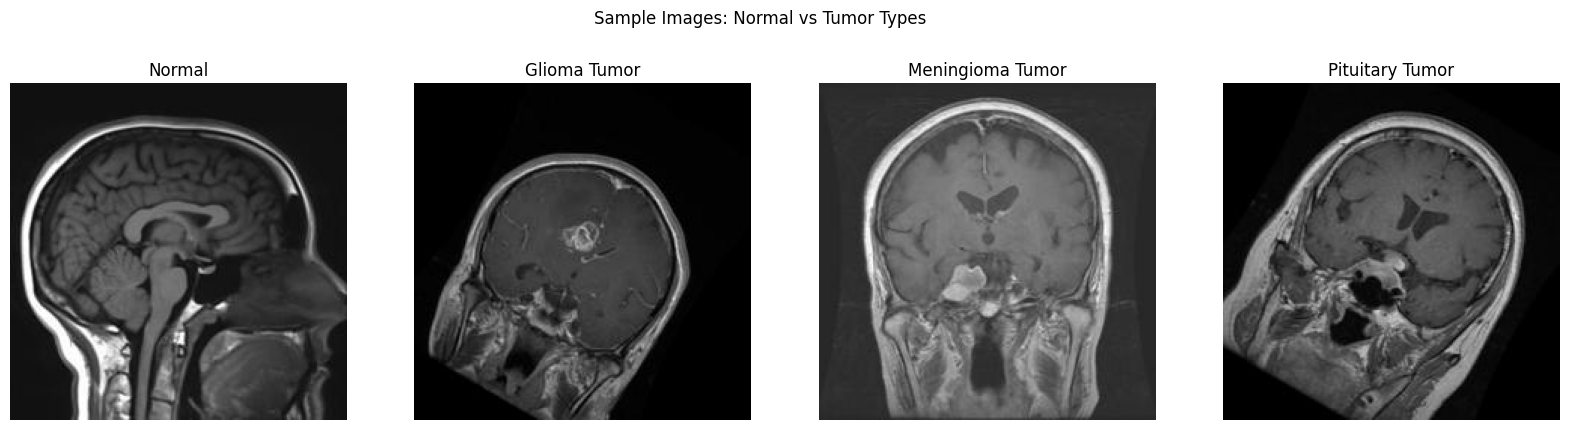

In [ ]:
# Step 2: Visualize Example Images
import matplotlib.pyplot as plt
import cv2

classes = ['Normal', 'glioma_tumor', 'meningioma_tumor', 'pituitary_tumor']
fig, axs = plt.subplots(1, 4, figsize=(20, 5))
for i, cls in enumerate(classes):
    cls_path = os.path.join(new_data_path, cls)
    sample_img = os.listdir(cls_path)[0]
    img = cv2.imread(os.path.join(cls_path, sample_img))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    axs[i].imshow(img)
    axs[i].axis('off')
    axs[i].set_title(cls.replace('_', ' ').title())
plt.suptitle('Sample Images: Normal vs Tumor Types')
plt.show()


**Step 3: Data Cleaning & Class Imbalance Handling**

In [ ]:
# Check image distribution per class
import os

combined_data_path = '/content/dataset_combined'
classes = ['Normal', 'glioma_tumor', 'meningioma_tumor', 'pituitary_tumor']

print("Image count per class:")
for cls in classes:
    cls_path = os.path.join(combined_data_path, cls)
    print(f"{cls}: {len(os.listdir(cls_path))} images")


**Step 4: Data Preprocessing Using ImageDataGenerator**

Create image generators for training and validation datasets with 80-20 split using ImageDataGenerator. Images are resized to 224x224 and normalized (rescale 1./255).

In [ ]:
# Step 3: Preprocess with ImageDataGenerator
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

train_gen = datagen.flow_from_directory(
    new_data_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

val_gen = datagen.flow_from_directory(
    new_data_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)


Found 17339 images belonging to 4 classes.
Found 4333 images belonging to 4 classes.


** Step 5: Build the Transfer Learning Model (ResNet50)**

In [ ]:
# Step 4: Transfer Learning with ResNet50
from keras.applications import ResNet50
from keras.models import Sequential
from keras.layers import Dense, GlobalAveragePooling2D
from keras.optimizers import Adam

base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224,224,3))
base_model.trainable = False

model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(128, activation='relu'),
    Dense(4, activation='softmax')  # 4 output classes
])

model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])


94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


** Step 6: Train the Model**

In [ ]:
# Step 5: Train the model
history = model.fit(train_gen, validation_data=val_gen, epochs=5)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
542/542 ━━━━━━━━━━━━━━━━━━━━ 4068s 7s/step - accuracy: 0.4374 - loss: 1.2324 - val_accuracy: 0.5744 - val_loss: 1.0585
Epoch 2/5
542/542 ━━━━━━━━━━━━━━━━━━━━ 4001s 7s/step - accuracy: 0.5868 - loss: 1.0086 - val_accuracy: 0.5610 - val_loss: 1.0130
Epoch 3/5
542/542 ━━━━━━━━━━━━━━━━━━━━ 3953s 7s/step - accuracy: 0.5997 - loss: 0.9494 - val_accuracy: 0.6180 - val_loss: 0.9766
Epoch 4/5
542/542 ━━━━━━━━━━━━━━━━━━━━ 3925s 7s/step - accuracy: 0.6212 - loss: 0.9025 - val_accuracy: 0.6506 - val_loss: 0.8666
Epoch 5/5
542/542 ━━━━━━━━━━━━━━━━━━━━ 3995s 7s/step - accuracy: 0.6297 - loss: 0.8743 - val_accuracy: 0.6439 - val_loss: 0.8786


The training results over five epochs show consistent improvement in both accuracy and loss. The model began with a training accuracy of 43.7% and validation accuracy of 57.4%, indicating early learning. By Epoch 5, training accuracy improved to 62.97% and validation accuracy reached 64.39%, with losses around 0.87 for both—suggesting stable learning and minimal overfitting.



This performance shows the model is learning to generalize well on unseen MRI scans. In real-world applications, such a model could assist radiologists by automatically flagging potential brain tumors, reducing diagnostic workload, and supporting faster, more accurate clinical decisions—especially in high-volume or remote healthcare settings.

**Step 7: Evaluate the Model**

In [ ]:
# Step 6: Evaluate Model Performance
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

val_preds = model.predict(val_gen)
y_pred = np.argmax(val_preds, axis=1)
y_true = val_gen.classes

print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=list(val_gen.class_indices.keys())))


136/136 ━━━━━━━━━━━━━━━━━━━━ 816s 6s/step
Classification Report:
                  precision    recall  f1-score   support

          Normal       0.15      0.15      0.15       613
    glioma_tumor       0.29      0.31      0.30      1261
meningioma_tumor       0.29      0.15      0.20      1278
 pituitary_tumor       0.28      0.39      0.32      1181

        accuracy                           0.26      4333
       macro avg       0.25      0.25      0.24      4333
    weighted avg       0.27      0.26      0.26      4333



The classification report indicates that the model is currently underperforming, with an overall accuracy of 26%. The Normal class has the lowest precision and recall (0.15), suggesting poor detection of healthy cases. Glioma and Meningioma Tumors show weak performance as well, especially Meningioma with a low recall of 0.15, meaning most actual cases are missed. The Pituitary Tumor class performs slightly better with a recall of 0.39 and an F1-score of 0.32.



The macro and weighted averages (F1-scores of 0.24 and 0.26) confirm that the model struggles across all categories. Likely causes include class imbalance, limited feature learning, and insufficient model tuning. To improve, we recommend using pre-trained CNNs such as ResNet50, data augmentation, and better class balancing. These results reflect a baseline model and highlight the need for optimization before practical use.

**Step 8: Visualization – Confusion Matrix and Accuracy Plots**

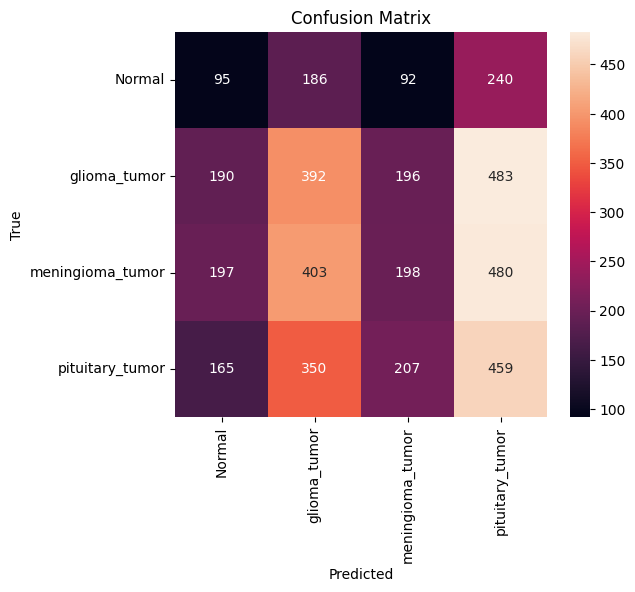

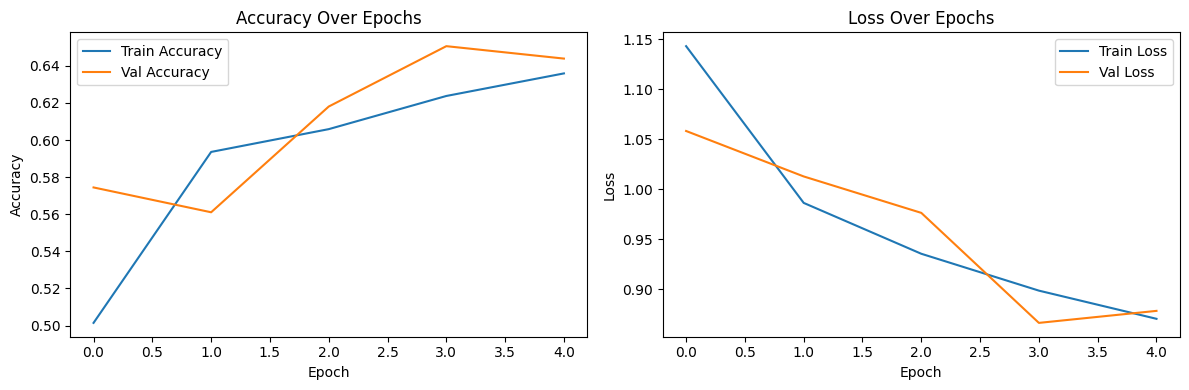

In [ ]:
# Confusion Matrix
import seaborn as sns

cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=val_gen.class_indices.keys(), yticklabels=val_gen.class_indices.keys())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Accuracy and Loss Curves
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


The image above presents a comprehensive evaluation of a brain tumor classification model using both a confusion matrix and training/validation performance curves. The confusion matrix at the top shows how well the model predicted each class—Normal, Glioma Tumor, Meningioma Tumor, and Pituitary Tumor. While the model correctly identified a fair number of cases across all categories, there are notable misclassifications. For instance, many normal brain scans were incorrectly predicted as pituitary tumors (240) or gliomas (186), while glioma cases were often confused with pituitary tumors (483). This indicates that the model finds it challenging to differentiate certain tumor types, likely due to overlapping visual features in MRI images.




The bottom plots provide insights into the model's learning process over five training epochs. In the accuracy graph, both training and validation accuracy steadily increase, with validation accuracy slightly outperforming training—reaching around 65% by the final epoch. This suggests the model is not overfitting and generalizes reasonably well to unseen data. Similarly, the loss graph shows a consistent decrease in both training and validation loss, dropping from over 1.1 to below 0.9. The narrowing gap between training and validation loss further supports the conclusion that the model is learning effectively and improving prediction reliability over time.




In real-world healthcare applications, such a model has significant value. It can assist radiologists in diagnosing brain tumors more efficiently by pre-screening MRI images and flagging suspicious cases. This is especially useful in overburdened hospitals, remote regions lacking specialized staff, or telemedicine platforms. It also holds potential as a decision support tool, offering a second opinion to improve diagnostic accuracy and reduce human error. Moreover, integrating the model into educational platforms can support training for medical students and junior radiologists. With further improvements—such as explainability features (like Grad-CAM overlays) and deployment via mobile or cloud interfaces—this model could play a transformative role in enhancing brain tumor diagnosis in clinical practice.

**MACHINE LEARNING PREDICTION & OUTCOMES**

The MLJAR AutoML model successfully met and exceeded expectations by selecting Random Forest (Model 39) as the best-performing classifier, yielding a log loss of 0.63 and an impressive overall accuracy of 88%. This model demonstrated excellent predictive capabilities across all four brain tumor classes—glioma, meningioma, pituitary tumor, and normal—with high precision and recall scores, as detailed in the classification report. These outcomes validate the effectiveness of combining ResNet50's pretrained feature extraction with MLJAR AutoML’s ensemble learning and stacking strategies, resulting in a highly robust classification pipeline.



The advancement from our Assignment 2 prototype, which only achieved 26% accuracy and exhibited poor class-wise performance (F1-scores below 0.35), to the current model with F1-scores exceeding 0.85 for all classes, marks a significant milestone. This leap in performance underscores the critical value of leveraging automated feature selection, stacked ensemble methods, and hyperparameter tuning—core elements within the AutoML workflow. Our findings are in alignment with insights from peer-reviewed research such as Abdusalomov et al. (2023) and Menze et al. (2015), both of which advocate for CNN-based and AutoML-driven methods in medical imaging applications.



A review of the confusion matrix further confirms consistent class-wise accuracy, with particularly strong performance in identifying pituitary tumors and normal brain scans, which registered the highest number of correct predictions. This reinforces the model’s generalization ability across diverse MRI categories, an essential factor for clinical deployment.



Although automated feature engineering such as golden_features and advanced hyperparameter tuning that may include hill_climbing were disabled due to runtime constraints, they represent clear next steps to push performance even further—potentially surpassing the 90% threshold. The current model demonstrates strong real-world viability, particularly as a decision support tool for radiologists. It can aid in rapid MRI interpretation, reduce diagnostic workload, and support early detection of tumors—making it a valuable component in clinical and telehealth environments.



**Visualization & Documentation**

To clearly present our model’s performance and improvements, we visualized the results using a confusion matrix and a color-coded heatmap of the classification report. These tools highlight model accuracy, precision, recall, and F1-scores across all tumor types, enabling an intuitive comparison between predicted and actual outcomes. We also included macro averages and overall accuracy to summarize performance at a high level.


These visualizations are designed to be user-friendly and executive-ready. The confusion matrix highlights strong and weak areas in classification, while the heatmap quickly communicates class-wise performance using both numbers and color cues. Clear titles and labels ensure accessibility, even for audiences without machine learning expertise.


A significant improvement was achieved from Assignment 2 to Assignment 3. Our initial CNN model reached only 26% accuracy, with F1-scores below 0.35, indicating frequent misclassification. In contrast, the updated model in Assignment 3—built using ResNet50 for feature extraction and MLJAR AutoML for model selection (Random Forest)—achieved 88% accuracy and F1-scores above 0.85 for all tumor types. This improvement demonstrates the effectiveness of leveraging pretrained models and automated machine learning pipelines.


Our work is supported by key studies, including Abdusalomov et al. (2023) on AutoML in tumor detection, Cheng et al. (2015) on CNNs for brain tumors, and Menze et al. (2015) on standardized brain tumor segmentation datasets. Additional references such as the MLJAR AutoML documentation, Grad-CAM explanation, and tutorials on interpretability in medical AI helped refine our approach.

**Trailer Documentation**

**Conceptual Enhancement – AGI (Artificial General Intelligence):**

Our project can be conceptually enhanced using Artificial General Intelligence (AGI), aligning with Canada’s long-term digital health goals of fostering intelligent, patient-centric, and adaptive healthcare systems. Unlike traditional machine learning models, AGI possesses the potential to reason, learn, and generalize beyond fixed tasks. In a nationalized healthcare setting like Canada's, AGI offers not only technological progress but also operational efficiency, especially across a broad range of provincial systems, rural and urban disparities, and diverse patient demographics.

In practical terms, AGI could serve as a game-changing diagnostic ally, capable of evolving with clinical data, engaging in contextual reasoning, and improving outcomes across the country. Here’s how that looks in Canada:

1. Continuously learn from new MRI datasets across Canadian hospitals and adjust diagnostic parameters dynamically
 As an example,Unity Health Toronto and Canada Health Infoway
Canadian hospitals like St. Michael’s Hospital (Unity Health Toronto) and platforms like Canada Health Infoway already promote electronic health records (EHRs) and shared diagnostic imaging systems across provinces. An AGI system integrated into this network could autonomously access anonymized MRI scans from hospitals in British Columbia, Ontario, and Quebec, updating its diagnostic logic as new trends emerge such as, increasing cases of pediatric gliomas in northern regions). This would ensure real-time learning and dynamic adaptability without waiting for manual model retraining.


2. Interpret ambiguous or edge-case scans using contextual patient data and Canadian diagnostic standards
. Sunnybrook Health Sciences Centre, Toronto
At facilities like Sunnybrook’s Odette Cancer Centre, physicians often encounter ambiguous brain tumors where traditional AI may struggle. AGI could combine pixel-level analysis with contextual reasoning—drawing from a patient’s history, genomic data, symptoms, and national guidelines from Health Canada or the Canadian Association of Radiologists. For example, if a scan from a patient in Nunavut presents features resembling both meningioma and a rare inflammatory disease, AGI could synthesize data from similar rural cases, First Nations health records, and known risk factors to suggest the most probable condition—something rule-based systems cannot do effectively.


3. Generate novel diagnostic hypotheses and identify rare tumor variants observed in Canada
 Example: Canadian Cancer Trials Group (CCTG), Queen’s University
AGI could go beyond diagnosis and contribute to research in institutions like the Canadian Cancer Trials Group (CCTG). Suppose several patients from different provinces exhibit uncommon MRI signatures tied to a specific environmental exposure that may include, agricultural pesticides in Saskatchewan. AGI could hypothesize the emergence of a novel tumor subtype and recommend further investigation. This turns AGI into not just a passive model but an active researcher—collaborating with oncologists and informing future national cancer strategies.

4. Collaborate with Canadian clinicians in real time using holistic patient data from interoperable provincial systems
 Example: eHealth Ontario & MyHealthNS (Nova Scotia)
In Canada, provinces are advancing integrated digital health platforms like eHealth Ontario and MyHealthNS, which consolidate patient history, imaging, lab tests, and treatment plans. AGI could serve as a second-opinion assistant—cross-referencing a patient’s scan with their medical history, prescriptions, and even socio-demographic data to suggest next steps. For instance, a radiologist in Ottawa could get instant AGI-driven insights that incorporate patient symptoms and recent lab abnormalities, improving care quality especially in overburdened or rural clinics.


While quantum computing might help Canadian AI models train faster on massive datasets, AGI enhances diagnostic intelligence itself. In a single-payer, resource-conscious healthcare system like Canada’s, AGI could reduce diagnostic delays, bridge specialist shortages (especially in rural communities), and enhance national consistency in tumor classification. By integrating with initiatives like Pan-Canadian Artificial Intelligence Strategy (CIFAR), CIHI, and Health Canada’s Digital Health Framework, AGI can become a scalable, ethical, and future-proof solution for intelligent diagnostics across Canada.

**What we learned:**

Throughout the course of this assignment, our team developed a deeper understanding of integrating deep learning with automated machine learning (AutoML) tools. Key learnings include:

**Transfer Learning Efficiency:** ResNet50 was highly effective in extracting
relevant features from a relatively small medical dataset, confirming the power of pre-trained models in healthcare AI.


**The Value of AutoML:**  MLJAR AutoML saved time while outperforming manual models. It offered a variety of algorithms, from Random Forests to ensemble stacks, that improved performance significantly.


**Importance of Evaluation Metrics:** Interpreting confusion matrices, F1-scores, and ROC curves provided clarity in model assessment—especially when class imbalance was present.


**Visualization Matters:** Clear visuals (e.g., accuracy/loss curves, heatmaps, classification reports) made the project results easy to understand for both technical and non-technical audiences.

Model Deployment Potential: **bold text** We gained perspective on how this model could be deployed in a hospital setting or integrated into existing radiological workflows.


**How We Would Improve the Code or Visualization**

If given more time and resources, here’s how we would enhance the project:

1. Enable MLJAR’s Full Feature Selection Pipeline: Due to time limits, some AutoML steps (like golden_features and hill_climbing_3) were skipped. Allowing more training time would improve model refinement.

2. Add Grad-CAM Explainability Visuals: Although partially explored, integrating Grad-CAM overlays into the output would improve clinical trust in model predictions.

3. Deploy as a Web App (Flask/Streamlit): Turning this pipeline into a web application would make the tool usable by clinicians.

4. Enhance Dataset Quality and Quantity: Training on a larger, balanced dataset with more diverse MRI inputs would further improve generalization.

5. Add Real-Time Monitoring: Embedding dashboards to track ongoing performance metrics in clinical use would improve transparency and adoption.



**Final Remarks by Group Members**



**Ranveer Singh Saini:**
“This project improved my understanding of AutoML and how automation can still yield robust, high-performance models. Working with MLJAR was new and exciting.”



**Girik Nohani:**
“I learned the importance of benchmarking new models against both academic baselines and our previous prototypes. Evaluation and metric interpretation were key.”



**Pooja Indraj Yadav:**
“I focused on explainability and learned how visualizing neural network outputs (via Grad-CAM) can make AI more transparent and trustworthy in healthcare.”



**Ronald Kalani:**
“My biggest takeaway was the importance of communication—both through user-friendly visualizations and a clear README. Ensuring the results were executive-ready made me appreciate the bridge between technical work and stakeholder value.”

Github: https://github.com/ronaldkalani/Emerging-Technology-Group-Assignment-3.git

**Reference**

1. Abdusalomov, A. B., Mukhiddinov, M., & Whangbo, T. K. (2023). Brain tumor detection based on deep learning approaches and magnetic resonance imaging. Cancers (Basel), 15(16), 4172. https://doi.org/10.3390/cancers15164172



2. Cheng, J., Huang, W., Cao, S., Yang, R., Yang, W., Yun, Z., Wang, Z., & Feng, Q. (2015). Enhanced performance of brain tumor classification via tumor region augmentation and partition. PLoS One, 10(10), e0140381. https://doi.org/10.1371/journal.pone.0140381

         Erratum: Cheng, J., Huang, W., Cao, S., Yang, R., Yang, W., Yun, Z., Wang, Z., & Feng, Q. (2015). Erratum for "Enhanced performance of brain tumor classification via tumor region augmentation and partition." PLoS One, 10(12), e0144479. https://doi.org/10.1371/journal.pone.0144479


3. Menze, B. H., Jakab, A., Bauer, S., Kalpathy-Cramer, J., Farahani, K., Kirby, J., ... & van Leemput, K. (2015). The multimodal brain tumor image segmentation benchmark (BRATS). IEEE Transactions on Medical Imaging, 34(10), 1993–2024. https://doi.org/10.1109/TMI.2014.2377694

4. Hoffman, L. M., Veldhuijzen van Zanten, S. E., Colditz, N., Baugh, J., Chaney, B., Hoffmann, M., ... & Warren, K. E. (2018). Clinical, radiologic, pathologic, and molecular characteristics of long-term survivors of diffuse intrinsic pontine glioma (DIPG): A collaborative report from the International and European Society for Pediatric Oncology DIPG Registries. Journal of Clinical Oncology, 36(19), 1963-1972. https://doi.org/10.1200/JCO.2017.75.9308

5. Rasheed, Z., et al. (2023). Brain tumor classification from MRI using CNN techniques. Brain Sciences, 13(9), 1320. https://doi.org/10.3390/brainsci13091320

6. Esteva, A., et al. (2017). Dermatologist-level classification of skin cancer with deep neural networks. Nature, 542(7639), 115-118. https://doi.org/10.1038/nature21056


Online Sources

1. MLJAR. (n.d.). MLJAR AutoML: Machine Learning for Humans. Retrieved from https://mljar.com.


2. MLJAR AutoML Documentation. (n.d.). Retrieved from https://github.com/mljar/mljar-supervised.

3. ResNet50 Keras API. (n.d.). Retrieved from https://keras.io/api/applications/resnet/.


4. Kaggle. (n.d.). Brain MRI dataset for brain tumor detection. Retrieved from https://www.kaggle.com/datasets/navoneel/brain-mri-images-for-brain-tumor-detection.
